<a href="https://colab.research.google.com/github/mikulicmateo/StockPrediction/blob/main/StockPredict_SimpleModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls

drive  sample_data


In [2]:
import numpy as np
import json
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, BatchNormalization
from keras.layers.core import Dense, Dropout
from keras.regularizers import l2
from matplotlib import pyplot
from datetime import datetime

In [3]:
#model
def create_model():
  l_model = Sequential()
  l_model.add(Input(8))
  l_model.add(Dense(16, activation="relu"))
  l_model.add(Dense(32, activation="softplus"))
  l_model.add(Dense(16, activation="relu"))
  l_model.add(Dense(8, activation="softplus"))
  l_model.add(Dense(4, activation="linear"))
  l_model.add(Dense(2, activation="linear"))
  l_model.add(Dense(1, activation="softplus"))
  l_model.compile(Adam(learning_rate=0.0001), loss="msle", metrics=["mse", "mae", "msle"])
  return l_model

In [4]:
def calculate_typical_price(row):
    typical_price = (row[1] + row[2] + row[3])/3
    return typical_price

In [5]:
def load_from_dictionary(dataset):
  arr = []
  list_train = []
  list_valid = []
  list_test = []
  for j in dataset.keys():
    data_train = np.empty(shape=(0, 8))
    data_valid = np.empty(shape=(0, 8))
    data_test = np.empty(shape=(0, 8))
    for i in dataset[j]:
        date_string = i.get('date')
        arr = float(i.get('open')), float(i.get('high')), float(i.get('low')), float(i.get('close')), \
              float(i.get('volume')), float(i.get('rsi')), float(i.get('sma')), float(i.get('ema'))
        if date_string < "2018-01-01":
          data_train = np.append(data_train, [arr], axis=0)
        elif date_string < "2020-01-01":
          data_valid = np.append(data_valid, [arr], axis=0)
        else:
          data_test = np.append(data_test, [arr], axis=0)
    print(data_train.shape)
    if data_train.size:
      list_train.append(data_train)
    if data_valid.size:
      list_valid.append(data_valid)
    if data_test.size:
      list_test.append(data_test)
  
  return list_train, list_valid, list_test

In [6]:
def to_np_arr_for_N_days(listOfArrays):
  input_data = np.empty((0,8))
  output_data = np.empty((0,))
  for company in listOfArrays:
    num_rows, _ = company.shape
    for i in range(num_rows):
        if i + 1 > num_rows-1:
            print(company[i])
            break
        add = np.array([company[i + 1]]).reshape(1,8)
        input_data=np.append(input_data, add, axis=0)
        add = np.array([calculate_typical_price(company[i])])
        output_data=np.append(output_data, add, axis=0)
  
  return input_data,output_data

In [7]:
with open("/content/drive/MyDrive/dataset-extendedv3.json") as json_file:
    dataset = json.loads(json_file.read())

In [8]:
train_list, valid_list, test_list = load_from_dictionary(dataset)

(4546, 8)
(4546, 8)
(1866, 8)
(4546, 8)
(4546, 8)
(4546, 8)
(4546, 8)
(4546, 8)
(2970, 8)
(0, 8)
(885, 8)
(3934, 8)
(4546, 8)
(4546, 8)
(4546, 8)
(1222, 8)
(4029, 8)
(0, 8)
(4546, 8)
(0, 8)
(1494, 8)
(0, 8)
(4350, 8)
(3967, 8)
(0, 8)
(4546, 8)
(4546, 8)
(4546, 8)
(4546, 8)
(3949, 8)
(4546, 8)
(4546, 8)
(0, 8)
(4546, 8)
(991, 8)
(4546, 8)
(4301, 8)
(0, 8)
(0, 8)
(127, 8)
(4546, 8)
(478, 8)
(0, 8)
(0, 8)
(0, 8)
(0, 8)
(0, 8)
(4546, 8)
(4546, 8)
(2211, 8)
(0, 8)
(4323, 8)
(0, 8)
(4546, 8)
(507, 8)
(4546, 8)
(4546, 8)
(4546, 8)
(4546, 8)
(4546, 8)
(4546, 8)
(4546, 8)
(1234, 8)
(2440, 8)
(4546, 8)
(0, 8)
(0, 8)
(4546, 8)
(0, 8)
(4546, 8)
(4546, 8)
(24, 8)
(0, 8)
(4546, 8)
(4546, 8)
(4546, 8)
(4546, 8)
(40, 8)
(4546, 8)
(917, 8)
(4546, 8)
(4546, 8)
(3381, 8)
(4420, 8)
(0, 8)
(278, 8)
(0, 8)
(4546, 8)
(4546, 8)
(4546, 8)
(4546, 8)
(4546, 8)
(4546, 8)
(4546, 8)
(3062, 8)
(4546, 8)
(802, 8)
(1389, 8)
(0, 8)
(594, 8)
(1019, 8)
(4378, 8)
(2752, 8)
(4546, 8)
(0, 8)
(4546, 8)
(1708, 8)
(4138, 8)
(0

In [9]:
train_input, train_output = to_np_arr_for_N_days(train_list)

[1.17000e+02 1.19190e+02 1.15440e+02 1.16620e+02 1.13261e+07 6.86517e+01
 5.82713e+01 5.85591e+01]
[3.10000e+01 3.18100e+01 2.96900e+01 3.17500e+01 4.17750e+06 7.12166e+01
 1.30964e+01 1.30989e+01]
[2.19500e+01 2.21800e+01 2.08500e+01 2.12600e+01 9.13000e+05 4.40686e+01
 3.98940e+00 4.02910e+00]
[8.80000e+01 8.80000e+01 8.43800e+01 8.60600e+01 6.72710e+06 6.12701e+01
 7.86404e+01 7.85860e+01]
[1.16560e+02 1.18000e+02 1.14000e+02 1.17810e+02 3.97340e+06 7.99523e+01
 7.27000e-01 7.29100e-01]
[3.45600e+01 3.48100e+01 3.33800e+01 3.38100e+01 1.74755e+07 3.50371e+01
 1.58858e+01 1.59044e+01]
[7.56300e+01 7.56300e+01 7.25000e+01 7.31900e+01 5.46150e+06 3.86625e+01
 3.27687e+01 3.27224e+01]
[5.150000e+01 5.169000e+01 5.013000e+01 5.013000e+01 3.764036e+06
 3.705410e+01 2.210220e+01 2.210230e+01]
[2.44200e+01 2.57000e+01 2.43500e+01 2.51000e+01 5.51500e+05 3.80788e+01
 1.32752e+01 1.32831e+01]
[2.83600e+01 2.85000e+01 2.77100e+01 2.80100e+01 3.06630e+06 6.71177e+01
 2.61636e+01 2.60431e+01]
[4

In [10]:
valid_input, valid_output = to_np_arr_for_N_days(valid_list)

[1.545000e+02 1.548100e+02 1.535400e+02 1.542500e+02 4.195225e+06
 5.513290e+01 1.213875e+02 1.208760e+02]
[1.0420000e+01 1.1020000e+01 1.0340000e+01 1.0980000e+01 4.3479727e+07
 4.8799300e+01 1.0512800e+01 1.0695500e+01]
[3.120000e+02 3.221100e+02 3.110000e+02 3.205300e+02 4.326988e+06
 4.853350e+01 6.422480e+01 6.436820e+01]
[1.1720000e+03 1.1900000e+03 1.1705100e+03 1.1890100e+03 2.5878990e+06
 6.1571700e+01 1.1717316e+03 1.1651868e+03]
[1.7016000e+02 1.7230000e+02 1.6926000e+02 1.7226000e+02 2.5048048e+07
 5.4311000e+01 4.1110500e+01 4.1043200e+01]
[3.6380000e+01 3.6520000e+01 3.6240000e+01 3.6440000e+01 1.4503068e+07
 5.6041200e+01 2.9581300e+01 2.9547000e+01]
[5.6590000e+01 5.6750000e+01 5.6050000e+01 5.6220000e+01 1.0048319e+07
 4.6625500e+01 4.6946700e+01 4.7258400e+01]
[1.2520000e+01 1.2660000e+01 1.2500000e+01 1.2660000e+01 1.9363635e+07
 5.8119500e+01 1.0727200e+01 1.0697200e+01]
[1.26400e+01 1.29800e+01 1.25800e+01 1.29700e+01 7.78073e+05 6.56041e+01
 1.17792e+01 1.20040e+0

In [11]:
test_input, test_output = to_np_arr_for_N_days(test_list)

[1.350000e+02 1.359200e+02 1.347700e+02 1.354200e+02 3.148461e+06
 5.134300e+01 1.159637e+02 1.162939e+02]
[4.6860000e+01 4.9250000e+01 4.6630000e+01 4.9100000e+01 8.0764599e+07
 7.4559000e+01 4.2215600e+01 4.2894600e+01]
[4.24500e+02 4.30700e+02 4.21710e+02 4.30260e+02 9.53210e+06 7.37468e+01
 7.48160e+01 7.69915e+01]
[1.8750000e+03 1.8980100e+03 1.8641500e+03 1.8980100e+03 4.0359100e+06
 6.4564600e+01 1.7926196e+03 1.8041926e+03]
[2.9624000e+02 3.0060000e+02 2.9519000e+02 3.0035000e+02 3.3911864e+07
 7.8273700e+01 6.8056000e+01 6.8624700e+01]
[3.9300000e+01 3.9350000e+01 3.8880000e+01 3.9140000e+01 1.5667958e+07
 5.8403700e+01 3.3931100e+01 3.3905000e+01]
[9.108000e+01 9.214000e+01 9.037000e+01 9.204000e+01 7.873461e+06
 6.764540e+01 7.964810e+01 7.970970e+01]
[9.2900000e+00 9.4200000e+00 9.1900000e+00 9.4200000e+00 4.3423425e+07
 5.6750400e+01 9.0247000e+00 9.0475000e+00]
[4.223000e+01 4.223000e+01 4.126000e+01 4.175000e+01 1.024372e+06
 6.925380e+01 3.773120e+01 3.846940e+01]
[9.90

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit_transform(train_input)
scaler.fit_transform(valid_input)
scaler.fit_transform(test_input)

array([[0.03691239, 0.03668355, 0.03584458, ..., 0.60544056, 0.03563454,
        0.03620208],
       [0.03694177, 0.03768806, 0.03729719, ..., 0.69003979, 0.0354294 ,
        0.03606928],
       [0.0363515 , 0.03709173, 0.03676159, ..., 0.68754331, 0.03519418,
        0.03585839],
       ...,
       [0.0124813 , 0.01262099, 0.01253248, ..., 0.60707178, 0.01173733,
        0.01182524],
       [0.01259348, 0.01256004, 0.01267856, ..., 0.59671364, 0.01170281,
        0.01179517],
       [0.01277511, 0.01274291, 0.01284086, ..., 0.62075816, 0.01166144,
        0.01176833]])

In [13]:
model = create_model()
model.summary()
history = model.fit(x=train_input, y=train_output, validation_data=(valid_input, valid_output), batch_size=8, epochs=35, verbose=1, shuffle=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 2)                 10        
                                                                 
 dense_6 (Dense)             (None, 1)                 3

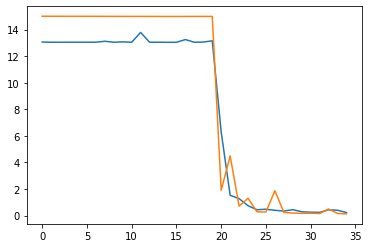

In [14]:
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.show()

In [15]:
results = model.evaluate(valid_input, valid_output, batch_size=8)
print("***Validation: ", results)

6677/6677 [==============================] - 9s 1ms/step - loss: 0.1294 - mse: 2756.6211 - mae: 11.7393 - msle: 0.1294
***Validation:  [0.1293955147266388, 2756.62109375, 11.739325523376465, 0.1293955147266388]


In [16]:
predictions = model.predict(test_input)

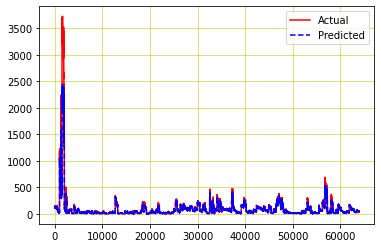

In [17]:
pyplot.plot(test_output, linestyle='solid', color='r')
pyplot.plot(predictions, linestyle='dashed', color='b')
pyplot.legend(['Actual','Predicted'], loc='best')
pyplot.grid(color = 'y', linewidth='0.5')
pyplot.show()

(4546, 8)
[3.10000e+01 3.18100e+01 2.96900e+01 3.17500e+01 4.17750e+06 7.12166e+01
 1.30964e+01 1.30989e+01]
[1.0420000e+01 1.1020000e+01 1.0340000e+01 1.0980000e+01 4.3479727e+07
 4.8799300e+01 1.0512800e+01 1.0695500e+01]
[1.0420000e+01 1.1020000e+01 1.0340000e+01 1.0980000e+01 4.3479727e+07
 4.8799300e+01 1.0512800e+01 1.0695500e+01]


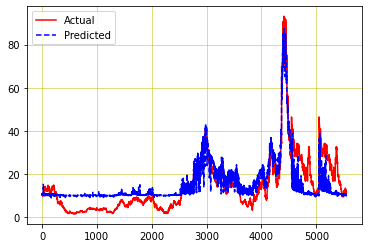

In [18]:
#Predict for AMD
with open("/content/drive/MyDrive/dataset-amd.json") as json_file:
    amd_dataset = json.loads(json_file.read())

test_list, test_list1, test_list2 = load_from_dictionary(amd_dataset)

amd_test_input, amd_test_output = to_np_arr_for_N_days(test_list)
amd_test_input1, amd_test_output1 = to_np_arr_for_N_days(test_list1)
amd_test_input2, amd_test_output2 = to_np_arr_for_N_days(test_list1)

amd_test_input = np.append(amd_test_input, amd_test_input1, axis=0)
amd_test_input = np.append(amd_test_input, amd_test_input2, axis=0)

amd_test_output = np.append(amd_test_output, amd_test_output1, axis=0)
amd_test_output = np.append(amd_test_output, amd_test_output2, axis=0)

scaler.fit_transform(amd_test_input)
amd_predictions = model.predict(amd_test_input)


pyplot.plot(amd_test_output, linestyle='solid', color='r')
pyplot.plot(amd_predictions, linestyle='dashed', color='b')
pyplot.legend(['Actual','Predicted'], loc='best')
pyplot.grid(color = 'y', linewidth='0.5')
pyplot.show()

In [19]:
from scipy.stats import pearsonr, spearmanr

pcorr, _ = pearsonr(amd_test_output, amd_predictions) #>0.5 and close to 1 high level of correlation
scorr, _ = spearmanr(amd_test_output, amd_predictions)
print("Pearson's correlation: ", pcorr)
print("Spearman's correlation: ", scorr)

Pearson's correlation:  [0.855094572399499]
Spearman's correlation:  0.866869758957561
